In [1]:
import pandas as pd
import numpy as np

In [2]:
TITANIC = pd.read_csv("Downloads/titanic.csv")

In [3]:
TITANIC.shape

(156, 13)

In [4]:
TITANIC.head()

,PassengerId,Survived,Pclass,Lname,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund,Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings,Mrs. John Bradley (Florence Briggs Thayer),female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen,Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle,Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen,Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
TITANIC['Age'].mean()

28.141507936507935

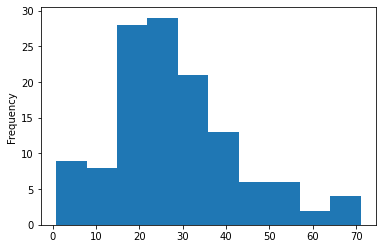

In [6]:
TITANIC['Age'].plot(kind="hist")

In [7]:
TITANIC['Age'].value_counts()

21.00    8
29.00    6
19.00    6
22.00    6
24.00    5
28.00    5
38.00    4
26.00    4
20.00    4
16.00    3
34.00    3
14.00    3
33.00    3
23.00    3
2.00     3
27.00    3
18.00    3
35.00    3
17.00    3
45.00    2
51.00    2
42.00    2
4.00     2
40.00    2
32.00    2
25.00    2
54.00    2
37.00    2
47.00    2
32.50    2
58.00    1
8.00     1
39.00    1
55.00    1
31.00    1
15.00    1
36.50    1
7.00     1
55.50    1
66.00    1
12.00    1
70.50    1
14.50    1
71.00    1
59.00    1
46.00    1
30.00    1
11.00    1
5.00     1
28.50    1
65.00    1
40.50    1
49.00    1
9.00     1
3.00     1
0.83     1
Name: Age, dtype: int64

In [8]:
AGE_COL = "Age"

In [9]:
AGE_GROUP_COl = "AgeGroup"

In [13]:
TITANIC[AGE_GROUP_COl] = TITANIC['Age']
TITANIC['Age'].fillna(-1, inplace=True)
TITANIC[AGE_GROUP_COl] = TITANIC['Age'].map(lambda age: int(age // 10) + 1)
TITANIC.head()

,PassengerId,Survived,Pclass,Lname,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,Braund,Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S,3
1,2,1,1,Cumings,Mrs. John Bradley (Florence Briggs Thayer),female,38.0,1,0,PC 17599,71.2833,C85,C,4
2,3,1,3,Heikkinen,Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3
3,4,1,1,Futrelle,Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S,4
4,5,0,3,Allen,Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S,4


In [14]:
TITANIC[AGE_GROUP_COl].value_counts()

3    47
0    30
4    23
2    22
5    11
1    11
6     8
8     2
7     2
Name: AgeGroup, dtype: int64

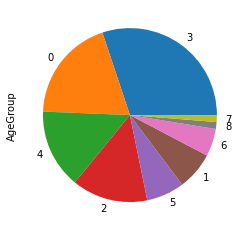

In [16]:
TITANIC[AGE_GROUP_COl].value_counts().plot.pie()

In [17]:
SURVIVED_COL = "Survived"

In [33]:
SEX_COL = "Sex"

In [18]:
TITANIC[SURVIVED_COL]

0      0
1      1
2      1
3      1
4      0
      ..
151    1
152    0
153    0
154    0
155    0
Name: Survived, Length: 156, dtype: int64

In [19]:
HEAD_ROWS_TO_SHOW = 15

In [22]:
TITANIC[[AGE_GROUP_COl, SURVIVED_COL]][:HEAD_ROWS_TO_SHOW]

,AgeGroup,Survived
0,3,0
1,4,1
2,3,1
3,4,1
4,4,0
5,0,0
6,6,0
7,1,0
8,3,1
9,2,1


In [23]:
age_by_survived = TITANIC.groupby([AGE_GROUP_COl, SURVIVED_COL])
age_by_survived

In [24]:
age_by_survived.size()

AgeGroup  Survived
0         0           17
          1           13
1         0            7
          1            4
2         0           14
          1            8
3         0           31
          1           16
4         0           13
          1           10
5         0           10
          1            1
6         0            6
          1            2
7         0            2
8         0            2
dtype: int64

In [25]:
age_by_survived = age_by_survived.size().unstack()
age_by_survived

Survived,0,1
AgeGroup,,
0,17.0,13.0
1,7.0,4.0
2,14.0,8.0
3,31.0,16.0
4,13.0,10.0
5,10.0,1.0
6,6.0,2.0
7,2.0,NaN
8,2.0,NaN


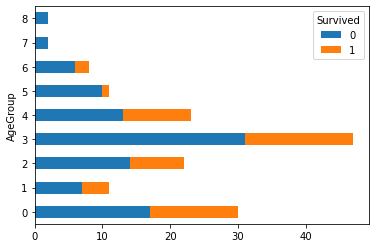

In [26]:
age_by_survived.fillna(0).plot(kind='barh', stacked=True)

In [28]:
age_by_survived_without_na = age_by_survived[1:].fillna(0)
age_by_survived_without_na

Survived,0,1
AgeGroup,,
1,7.0,4.0
2,14.0,8.0
3,31.0,16.0
4,13.0,10.0
5,10.0,1.0
6,6.0,2.0
7,2.0,0.0
8,2.0,0.0


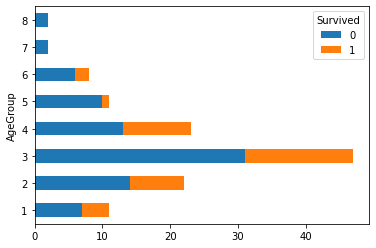

In [29]:
age_by_survived_without_na.fillna(0).plot(kind='barh', stacked=True)

In [30]:
def map_to_percent(r):
    return [float(v)/sum(r) for v in r]


age_by_survived_without_na.apply(map_to_percent, axis=1)

AgeGroup
1    [0.6363636363636364, 0.36363636363636365]
2    [0.6363636363636364, 0.36363636363636365]
3     [0.6595744680851063, 0.3404255319148936]
4    [0.5652173913043478, 0.43478260869565216]
5    [0.9090909090909091, 0.09090909090909091]
6                                 [0.75, 0.25]
7                                   [1.0, 0.0]
8                                   [1.0, 0.0]
dtype: object